## Supervised machine learning: Classification

### In the following notebook, i will present different applications of Machine Learning classification algorithms.

### Dataset description:

- Dataframe containing 177 rows and 13 columns, describing the results of chemical analyses of wines from the same region in Italy (Piedmont) but from three different cultivars (classes): Barolo, Grignolino, and Barbera
- goal: predict the wine cultivars (classes) from the measured values

### Files to use:

- wines.csv - file with analysis data
- wines_labels.csv - class labels

### Data and metadata

In [1]:
import pandas as pd

In [2]:
data_wines = pd.read_csv('data/wines.csv',sep=',', index_col = 0) #input features
meta_wines = pd.read_csv('data/wines_labels.csv',sep=',', index_col = 0) #output labels

In [56]:
data_wines.head()

,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavonoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [57]:
data_wines.shape # 177 rows; 13 columns

(177, 13)

In [58]:
data_wines.describe() # summary stats

,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavonoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
meta_wines #outputs; labels

,x
1,Barolo
2,Barolo
3,Barolo
4,Barolo
5,Barolo
...,...
173,Barbera
174,Barbera
175,Barbera
176,Barbera


In [7]:
target = meta_wines['x']
target.value_counts() #understand the distribution of different categories or labels in a dataset.

Grignolino    71
Barolo        58
Barbera       48
Name: x, dtype: int64

### Split data into train and test (holdout method)

In [8]:
from sklearn.model_selection import train_test_split

In [61]:
wines_X_train, wines_X_test, wines_y_train, wines_y_test = train_test_split(data_wines, target, test_size=0.3, random_state=1)
    # spliting data into training and testing sets
    #30% of the data will be allocated to the testing set; 70% for training.
    #setting the random seed to ensure reproducibility
    
        #wines_X_train (training input features)
        #wines_X_test (testing input features)
        #wines_y_train (training labels)
        #wines_y_test (testing labels).

print(wines_X_train.shape)
print(wines_X_test.shape)

(123, 13)
(54, 13)


### K-Nearest Neighbour

In [10]:
from sklearn.neighbors import KNeighborsClassifier

#### Training the KNN classification model  and evaluating its accuracy

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3) # the classifier will consider 3 nearest neighbors when making predictions

knn.fit(wines_X_train, wines_y_train) # train the KNN classifier (knn) on the training data (features and labels)
                                      #learning the relationship between the input features and the target labels.
    
knn_pred_Y = knn.predict(wines_X_test) #make predictions on the test data 

print('PECC (Accuracy): %0.2f' % knn.score(wines_X_test, wines_y_test)) #calculates and prints the accuracy of the KNN model on the test set. 

PECC (Accuracy): 0.76


C:\Users\filip\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\filip\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

The KNN classifier correctly predicted the labels for 76% of the samples in the test set.

#### More evaluation metrics

In [12]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [13]:
# precision, recall, and accuracy scores

print('Precision: %0.2f' % precision_score(wines_y_test, knn_pred_Y, average='weighted'))
print('Recall: %0.2f' % recall_score(wines_y_test, knn_pred_Y, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(wines_y_test, knn_pred_Y))

Precision: 0.80
Recall: 0.76
Accuracy: 0.76


- 80% of the positive predictions made by the classifier were correct. 

- The classifier correctly identified 76% of the actual positive instances in the test set. 

- The accuracy of 76% indicates that the KNN model correctly predicted the labels for 76% of the samples in the test set.

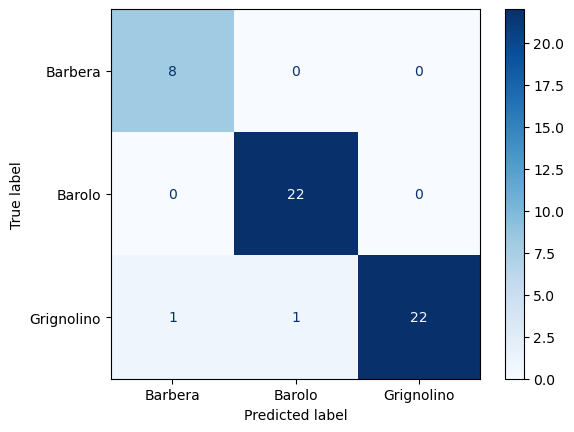

In [64]:
knn_cm = ConfusionMatrixDisplay.from_predictions(wines_y_test, knn_pred_Y, display_labels=knn.classes_, cmap='Blues')
knn_cm

### Decision trees

In [66]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(wines_X_train, wines_y_train) #Train the decision tree mode
                                             # wines_X_train represents the training features
                                             # wines_y_train represents the corresponding target labels.

tree_y_pred = tree_model.predict(wines_X_test) #Make predictions on the test data


In [73]:
#performance metrics 
print('PECC (Accuracy): %0.2f' % tree_model.score(wines_X_test, wines_y_test))
print('Precision: %0.2f' % precision_score(wines_y_test, tree_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(wines_y_test, tree_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(wines_y_test, tree_y_pred))

PECC (Accuracy): 0.87
Precision: 0.89
Recall: 0.87
Accuracy: 0.87


- The model correctly predicted the labels for 87% of the samples in the test set.
- The precision of 0.89 indicates that 89% of the positive predictions made by the classifier were correct. 
- The recall score of 0.87 means that your classifier correctly identified 87% of the actual positive instances in the test set. 
- The accuracy score of 0.87 represents the overall correctness of predictions across all classes in your test set. 

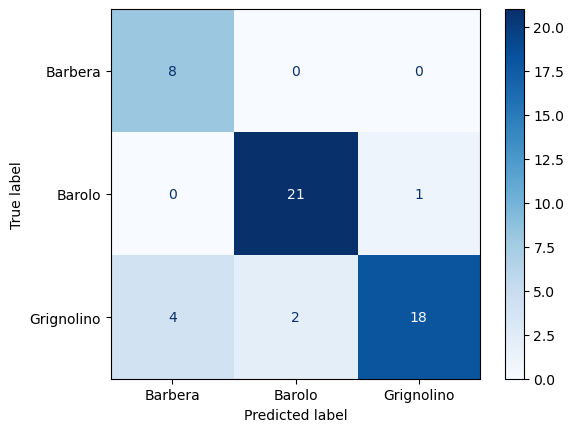

In [68]:
tree_cm = ConfusionMatrixDisplay.from_predictions(wines_y_test, tree_y_pred, display_labels=tree_model.classes_, cmap='Blues')
tree_cm

### Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(wines_X_train, wines_y_train) # Train the Gaussian Naive Bayes model:
gnb_y_pred = gnb_model.predict(wines_X_test) # Make predictions on the test data

In [72]:
#performance metrics 
print('PECC (Accuracy): %0.2f' % gnb_model.score(wines_X_test, wines_y_test))
print('Precision: %0.2f' % precision_score(wines_y_test, gnb_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(wines_y_test, gnb_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(wines_y_test, gnb_y_pred))

PECC (Accuracy): 0.96
Precision: 0.97
Recall: 0.96
Accuracy: 0.96


- The model correctly predicted the labels for 96% of the samples in the test set. 
- The precision score of 0.97 indicates that 97% of the positive predictions made by the classifier were correct. 
- The recall score of 0.96 means that the classifier correctly identified 96% of the actual positive instances in the test set. 
- The accuracy score of 0.96 represents the overall correctness of predictions across all classes in the test set. 

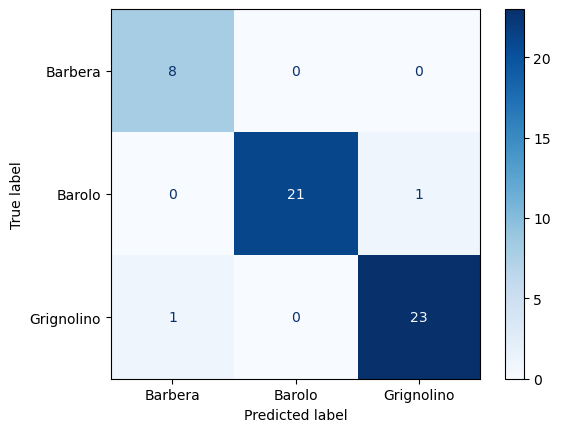

In [18]:
gnb_cm = ConfusionMatrixDisplay.from_predictions(wines_y_test, gnb_y_pred, display_labels=gnb_model.classes_, cmap='Blues')
gnb_cm

### Logistic Regression

In [75]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto") 

logistic.fit(wines_X_train, wines_y_train) # train the logistic regression model on the training data. 

logistic_y_pred = logistic.predict(wines_X_test)

In [76]:
# performance metrics 

print('PECC (Accuracy): %0.2f' % logistic.score(wines_X_test, wines_y_test))
print('Precision: %0.2f' % precision_score(wines_y_test, logistic_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(wines_y_test, logistic_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(wines_y_test, logistic_y_pred))

PECC (Accuracy): 0.94
Precision: 0.95
Recall: 0.94
Accuracy: 0.94


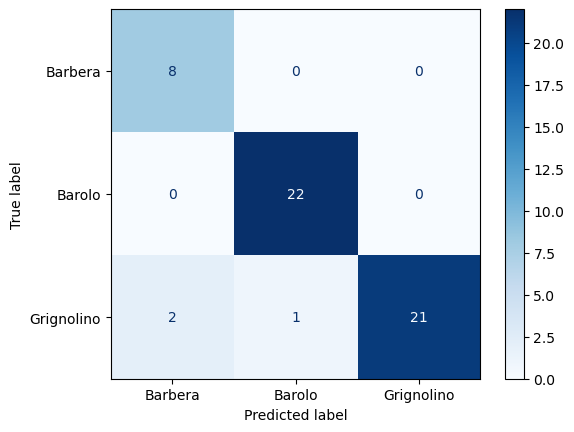

In [77]:
logistic_cm = ConfusionMatrixDisplay.from_predictions(wines_y_test, logistic_y_pred, display_labels=logistic.classes_, cmap='Blues')
logistic_cm

### SVM

In [78]:
from sklearn import svm

svm_model = svm.SVC(kernel = "linear")
svm_model.fit(wines_X_train, wines_y_train) #training the model

svm_y_pred = svm_model.predict(wines_X_test)

In [79]:
#performance metrics
print('PECC (Accuracy): %0.2f' % svm_model.score(wines_X_test, wines_y_test))
print('Precision: %0.2f' % precision_score(wines_y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(wines_y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(wines_y_test, svm_y_pred))

PECC (Accuracy): 0.96
Precision: 0.97
Recall: 0.96
Accuracy: 0.96


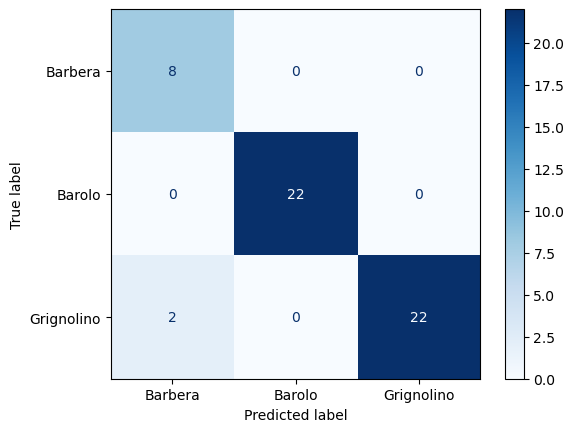

In [80]:
svm_cm = ConfusionMatrixDisplay.from_predictions(wines_y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm

SVM with a radial basis function (RBF) kernel

In [81]:
svm_rbf = svm.SVC(kernel = "rbf")

svm_rbf.fit(wines_X_train, wines_y_train) # train the classifier

svm_rbf_y_pred = svm_rbf.predict(wines_X_test)

In [82]:
print('PECC (Accuracy): %0.2f' % svm_rbf.score(wines_X_test, wines_y_test))

PECC (Accuracy): 0.72


## Cross validation: SVM model

Cross-validation is a technique used to assess the performance of a ML model in a more robust and reliable manner

In [84]:
from sklearn.model_selection import cross_val_score

scores_svm_cv = cross_val_score(estimator=svm_model, X=data_wines, y=target, cv = 5) 
                #cross-validation using 5 folds; computing accuracy scores for each fold; dataset is divided into five equal parts/folds
                # The model is trained and evaluated five times, corresponding to the five folds. 

print('Accuracy values:', scores_svm_cv)
print('Mean accuracy: %0.2f' % scores_svm_cv.mean())

Accuracy values: [0.88888889 0.94444444 0.94285714 1.         1.        ]
Mean accuracy: 0.96


#### F1 score

cross_val_score is used again, but this time we specify scoring="f1_weighted". 
The F1 score is a metric that combines precision and recall, providing a balanced measure of a classifier's performance.

In [86]:
scores_svm_f1 = cross_val_score(estimator=svm_model, X=data_wines, y=target, scoring="f1_weighted", cv=5)
print('F1 values:', scores_svm_f1)
print('Mean F1: %0.2f' % scores_svm_f1.mean())

F1 values: [0.88888889 0.94352462 0.94285714 1.         1.        ]
Mean F1: 0.96


#### Leave-One-Out

In [87]:
from sklearn.model_selection import LeaveOneOut

loo_cv = LeaveOneOut()
scores_loo = cross_val_score(estimator=svm_model, X=data_wines, y=target, cv=loo_cv)

print('Mean accuracy: %0.2f' % scores_loo.mean()) # Overall measure of how well tje model is likely to perform on unseen data.

Mean accuracy: 0.95


#### Resampling

In [88]:
from sklearn.model_selection import ShuffleSplit

data_split = ShuffleSplit(n_splits = 30, test_size=0.3, random_state=1)

scores_ss = cross_val_score(estimator=svm_model, X=data_wines, y=target, cv=data_split)

print('Mean accuracy: %0.2f' % scores_ss.mean())

Mean accuracy: 0.95


## Ensemble models

### Bagging

In [89]:
from sklearn.ensemble import BaggingClassifier

bagged_knn_model = BaggingClassifier(knn, max_samples=0.5, max_features=0.5)

scores_bag_knn = cross_val_score(bagged_knn_model, data_wines, target, cv=5)

print('Accuracy values:', scores_bag_knn)
print('Mean accuracy: %0.2f' % scores_bag_knn.mean())

Accuracy values: [0.86111111 0.86111111 0.88571429 0.91428571 0.97142857]
Mean accuracy: 0.90


In [33]:
bagged_model_tree = BaggingClassifier(tree_model, max_samples=0.5, max_features=0.5)

scores_bag_tree = cross_val_score(bagged_model_tree, data_wines, target, cv=5)

print('Accuracy values:', scores_bag_tree)
print('Mean accuracy: %0.2f' % scores_bag_tree.mean())

Accuracy values: [0.94444444 0.94444444 0.94285714 1.         0.94285714]
Mean accuracy: 0.95


### Random Forests

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_model = RandomForestClassifier(n_estimators=100)

scores_rf = cross_val_score(rf_model, data_wines, target, cv=5)

print('Accuracy values:', scores_rf)
print('Mean accuracy: %0.2f' % scores_rf.mean())

Accuracy values: [0.97222222 0.94444444 1.         0.97142857 1.        ]
Mean accuracy: 0.98


### Boosting

In [93]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = AdaBoostClassifier(n_estimators=100)

scores_ada = cross_val_score(ada_tree, data_wines, target, cv=5)

print('Accuracy values:', scores_ada)
print('Mean accuracy: %0.2f' % scores_ada.mean())

Accuracy values: [0.69444444 0.94444444 0.6        0.62857143 1.        ]
Mean accuracy: 0.77


### Gradient Bosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'log_loss'}

gradient_boost = GradientBoostingClassifier(**params)

scores_gradient = cross_val_score(gradient_boost, data_wines, target, cv=5)

print('Accuracy values:', scores_gradient)
print('Mean accuracy: %0.2f' % scores_gradient.mean())

Accuracy values: [nan nan nan nan nan]
Mean accuracy: nan


C:\Users\filip\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\filip\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\filip\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\filip\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'l

### Voting classifiers

In [94]:
from sklearn.ensemble import VotingClassifier

In [95]:
voting_cls = VotingClassifier(estimators=[('lr', logistic), ('rf', rf_model), ('gnb', gnb_model)], voting='hard')

for clf, label in zip([logistic, rf_model, gnb_model, voting_cls], ['Logistic', "RF", "NB", 'Ensemble']):
    scores = cross_val_score(clf, data_wines, target, cv=5)
    print("Accuracy: %0.2f (std %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (std 0.02) [Logistic]
Accuracy: 0.98 (std 0.02) [RF]
Accuracy: 0.97 (std 0.02) [NB]
Accuracy: 0.98 (std 0.01) [Ensemble]


## Feature selection

### VarianceThreshold

In [96]:
from sklearn.feature_selection import VarianceThreshold

In [97]:
filter_vt = VarianceThreshold(threshold=0.5)
data_filtered_vt = filter_vt.fit_transform(data_wines)

print(data_wines.shape)
print(data_filtered_vt.shape)

(177, 13)
(177, 7)


In [110]:
scores = cross_val_score(svm_model, data_wines, target, cv=10)
print('Old Mean accuracy: %0.2f' % scores.mean())

scores_vt = cross_val_score(svm_model, data_filtered_vt, target, cv=10)
print('New Mean accuracy: %0.2f' % scores_vt.mean())

Old Mean accuracy: 0.96
New Mean accuracy: 0.96


### SelectKBest

In [111]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [112]:
filt_kb = SelectKBest(chi2, k=8).fit_transform(data_wines, target)
print(filt_kb.shape)

scores_kb = cross_val_score(svm_model, filt_kb, target, cv=10)
print('Mean accuracy: %0.2f' % scores_kb.mean())

(177, 8)
Mean accuracy: 0.96


In [113]:
filt_kb2 = SelectKBest(f_classif, k=8).fit_transform(data_wines, target)
print(filt_kb2.shape)

scores_kb2 = cross_val_score(svm_model, filt_kb2, target, cv=10)
print('Mean accuracy: %0.2f' % scores_kb2.mean())

(177, 8)
Mean accuracy: 0.98


### Wrapper: recursive feature elimination (RFE)

In [114]:
from sklearn.feature_selection import RFE

In [115]:
svm_rfe = svm.SVC(kernel = "linear", C=100.)

rfe = RFE(estimator=svm_rfe, n_features_to_select=8, step=2)

scores_rfe = cross_val_score(rfe, data_wines, target, cv=10)
print('Mean accuracy: %0.2f' % scores_rfe.mean())


Mean accuracy: 0.92


### Hyperparameter optimisation

In [116]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear', 'rbf'], 'C':[1, 10, 100, 1000, 10000, 100000], 'gamma':[1e-3, 1e-4, 1e-5, 1e-6]}

svm_model_d = svm.SVC()
opt_model_d = GridSearchCV(svm_model_d, parameters)

opt_model_d.fit(wines_X_train, wines_y_train)
print(opt_model_d.best_estimator_)

print('PECC (Accuracy): %0.2f' % opt_model_d.score(wines_X_test, wines_y_test))

SVC(C=10, gamma=0.001, kernel='linear')
PECC (Accuracy): 0.96


In [117]:
from sklearn.model_selection import RandomizedSearchCV

svm_model_d = svm.SVC()
opt_model_d = RandomizedSearchCV(svm_model_d, parameters)

opt_model_d.fit(wines_X_train, wines_y_train)
print(opt_model_d.best_estimator_)

print('PECC (Accuracy): %0.2f' % opt_model_d.score(wines_X_test, wines_y_test))

SVC(C=1000, gamma=0.0001, kernel='linear')
PECC (Accuracy): 0.96


### Using standardized input data

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wines_X_train)
wines_X_tr_sc = scaler.transform(wines_X_train)
wines_X_ts_sc = scaler.transform(wines_X_test)

In [119]:
knn.fit(wines_X_tr_sc, wines_y_train)
knn_pred_Y = knn.predict(wines_X_ts_sc)

print('PECC (Accuracy): %0.2f' % knn.score(wines_X_ts_sc, wines_y_test))

PECC (Accuracy): 0.96


C:\Users\filip\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\filip\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [120]:
svm_rbf.fit(wines_X_tr_sc, wines_y_train)
print('PECC (Accuracy): %0.2f' % svm_rbf.score(wines_X_ts_sc, wines_y_test))

PECC (Accuracy): 1.00


In [121]:
svm_model_d2 = svm.SVC()
opt_model_d2 = RandomizedSearchCV(svm_model_d2, parameters)

opt_model_d2.fit(wines_X_tr_sc, wines_y_train)
print(opt_model_d2.best_estimator_)

print('PECC (Accuracy): %0.2f' % opt_model_d2.score(wines_X_ts_sc, wines_y_test))

SVC(C=10, gamma=0.001, kernel='linear')
PECC (Accuracy): 0.98
